In [2]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy.stats as stats
from run_stats import *

##### Smell Rating

In [3]:
survey_data = pd.read_excel("./Experimental_Data_revised.xlsx", 'Surveys')

Smell Rating

Neutral: [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0]
Lemon: [3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5]
Fish: [1.0, 1.5, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0]

Neutral, num elements: 8, mean: 3.125, std: 0.33071891388307384, normal (above 0.05 is normal): 1.0472282383489073e-06
Lemon, num elements: 10, mean: 3.75, std: 0.51234753829798, normal (above 0.05 is normal): 0.003651990322396159
fish, num elements: 10, mean: 2.45, std: 0.85, normal (above 0.05 is normal): 0.4456087648868561
Kruskal-Wallis: H 12.160414657666351, P VAL: 0.0022877022971021393

neutral v fish | U-stat: 58.5, p-val: 0.06796686314107997, effect size: 0.9486832980505135, other effect size: 0.903507902905251
neutral v lemon | U-stat: 16.5, p-val: 0.02001910947636308, effect size: -1.3363062095621219, other effect size: -1.272672580535354
fish v lemon | U-stat: 12.0, p-val: 0.003006463006392221, effect size: -1.7573630453313984, other effect size: -1.6831082687681



/Users/zacharykaras/Desktop/Projects/vandy/smell_study/replication_package/run_stats.py:158: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  neut_list = neut_list.replace(' ', np.nan).dropna()


{'Smell Rating': {'neutral': [3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0],
  'lemon': [3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.5],
  'fish': [1.0, 1.5, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0]}}

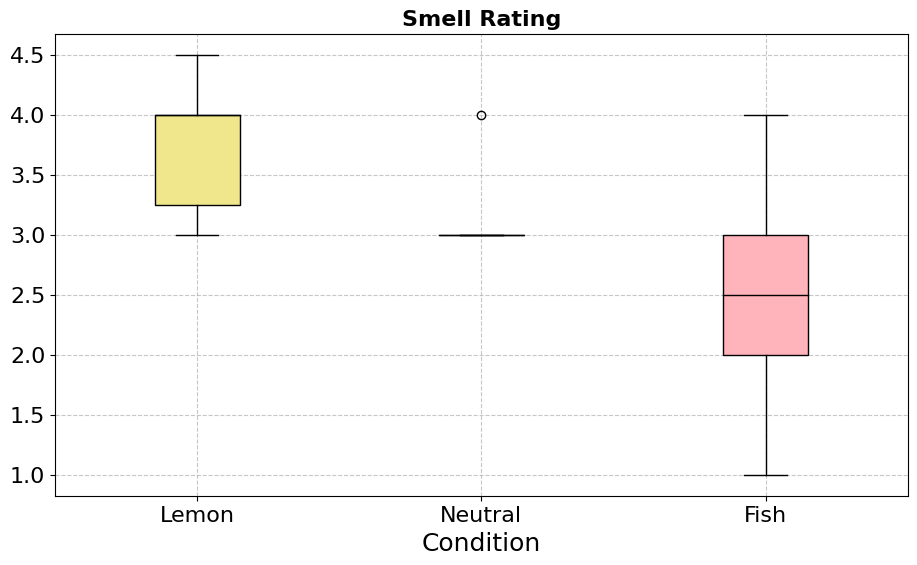

In [ ]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'RATING')
ratings = three_lists_stats(fish, lemon, neutral, 'Smell Rating')

CPP

Neutral: [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0]
Lemon: [1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0]
Fish: [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]

Neutral, num elements: 10, mean: 1.8, std: 0.8717797887081347, normal (above 0.05 is normal): 0.004218838177621365
Lemon, num elements: 10, mean: 2.1, std: 0.7, normal (above 0.05 is normal): 0.035864491015672684
fish, num elements: 10, mean: 2.0, std: 0.4472135954999579, normal (above 0.05 is normal): 0.00027618114836513996
Kruskal-Wallis: H 0.9559683794466293, P VAL: 0.6200319997819717



{'CPP': {'neutral': [1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 3.0],
  'lemon': [1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0],
  'fish': [1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0]}}

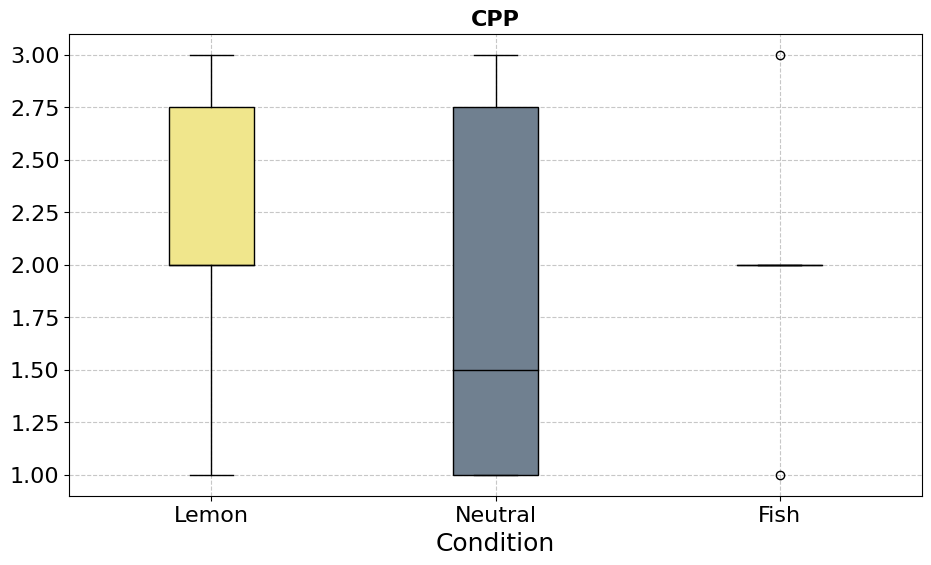

In [ ]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'CPP_Experience')
yrs_experience = three_lists_stats(fish, lemon, neutral, 'CPP')

GPA

Neutral: [3.0, 3.2, 3.2, 3.5, 3.7, 3.7, 3.8, 3.9, 3.92, 3.97]
Lemon: [3.6, 3.6, 3.7, 3.7, 3.8, 3.8, 3.83, 3.87, 3.93, 3.982]
Fish: [3.0, 3.6, 3.6, 3.8, 3.83, 3.88, 3.9, 3.9, 4.0, 4.0]

Neutral, num elements: 10, mean: 3.589, std: 0.32834280866192267, normal (above 0.05 is normal): 0.175278902053833
Lemon, num elements: 10, mean: 3.7812000000000006, std: 0.12340567247902344, normal (above 0.05 is normal): 0.6543071866035461
fish, num elements: 10, mean: 3.751, std: 0.2834237110758378, normal (above 0.05 is normal): 0.00542928883805871
Kruskal-Wallis: H 1.6767556652456894, P VAL: 0.4324113984711837



{'GPA': {'neutral': [3.0, 3.2, 3.2, 3.5, 3.7, 3.7, 3.8, 3.9, 3.92, 3.97],
  'lemon': [3.6, 3.6, 3.7, 3.7, 3.8, 3.8, 3.83, 3.87, 3.93, 3.982],
  'fish': [3.0, 3.6, 3.6, 3.8, 3.83, 3.88, 3.9, 3.9, 4.0, 4.0]}}

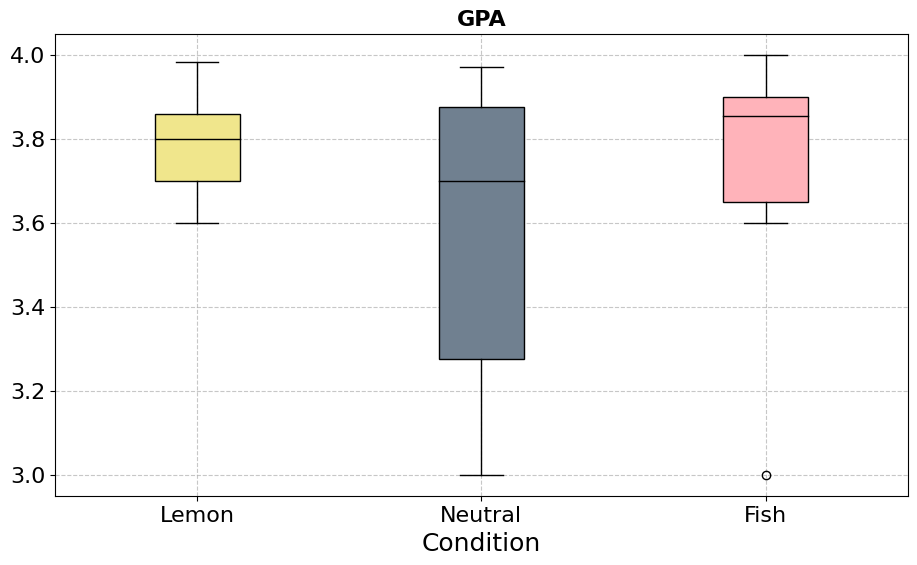

In [ ]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'GPA')
gpa = three_lists_stats(fish, lemon, neutral, 'GPA')

AGE

Neutral: [18.0, 19.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 23.0]
Lemon: [19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 22.0]
Fish: [19.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0]

Neutral, num elements: 10, mean: 20.6, std: 1.3564659966250538, normal (above 0.05 is normal): 0.7316085696220398
Lemon, num elements: 10, mean: 20.3, std: 0.9000000000000001, normal (above 0.05 is normal): 0.28687137365341187
fish, num elements: 10, mean: 20.7, std: 0.9, normal (above 0.05 is normal): 0.286869615316391
ANOVA F: 0.33815028901734107, P VAL: 0.7160647498401089



{'AGE': {'neutral': [18.0,
   19.0,
   20.0,
   20.0,
   21.0,
   21.0,
   21.0,
   21.0,
   22.0,
   23.0],
  'lemon': [19.0, 19.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 22.0],
  'fish': [19.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 21.0, 22.0, 22.0]}}

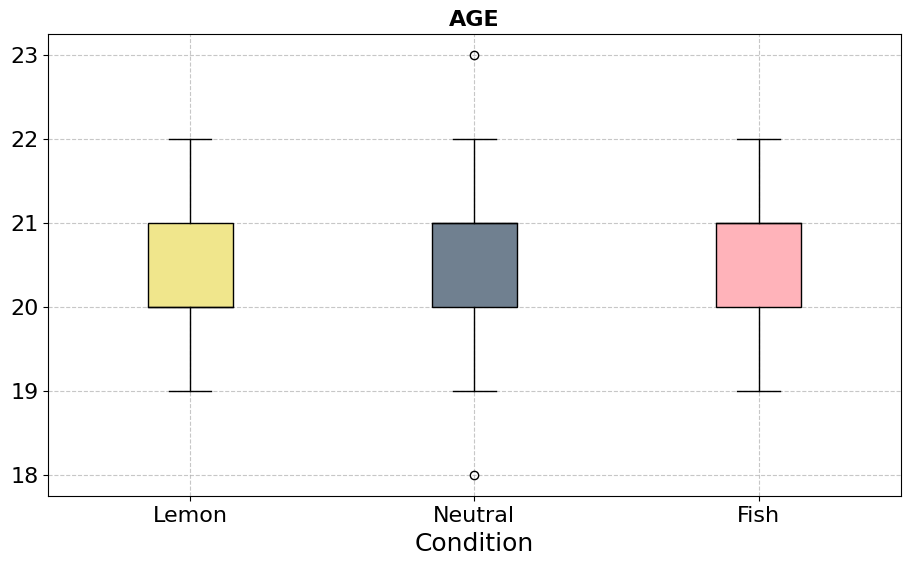

In [ ]:
fish, lemon, neutral = make_three_group_lists(survey_data, 'AGE')
age = three_lists_stats(fish, lemon, neutral, 'AGE')

## RQ1: COGNITIVE EFFORT

#### Variables

In [8]:
relevant_columns = ['neutral_fc',  'lemon_fc',   'fish_fc', 
                    'neutral_fd',  'lemon_fd',   'fish_fd', 
                    'neutral_avfd','lemon_avfd', 'fish_avfd']

### CODE COMPREHENSION

Fixation Count

Neutral: [1261.0, 1596.0, 1843.0, 1941.0, 1972.0, 1990.0, 2222.0, 2341.0, 3530.0, 4362.0]
Lemon: [1309.0, 1764.0, 1941.0, 1979.0, 2143.0, 2168.0, 2380.0, 2398.0, 2612.0, 3723.0]
Fish: [1452.0, 1576.0, 1710.0, 1917.0, 2408.0, 2791.0, 3173.0, 3230.0, 3408.0, 4529.0]

Neutral, num elements: 10, mean: 2305.8, std: 888.1848681440143, normal (above 0.05 is normal): 0.03254260867834091
Lemon, num elements: 10, mean: 2241.7, std: 603.9586161319334, normal (above 0.05 is normal): 0.22040298581123352
fish, num elements: 10, mean: 2619.4, std: 937.7518008513767, normal (above 0.05 is normal): 0.4714890420436859
Kruskal-Wallis: H 0.5736760124610634, P VAL: 0.7506333169090417

Cumulative Fixation Duration

Neutral: [235382.0, 405959.0, 412331.0, 432115.0, 473489.0, 485718.0, 511299.0, 623489.0, 952389.0, 1092603.0]
Lemon: [360918.0, 463633.0, 473353.0, 501798.0, 543382.0, 567828.0, 569351.0, 672657.0, 692109.0, 1065841.0]
Fish: [357461.0, 393965.0, 422216.0, 514106.0, 755981.0, 7682

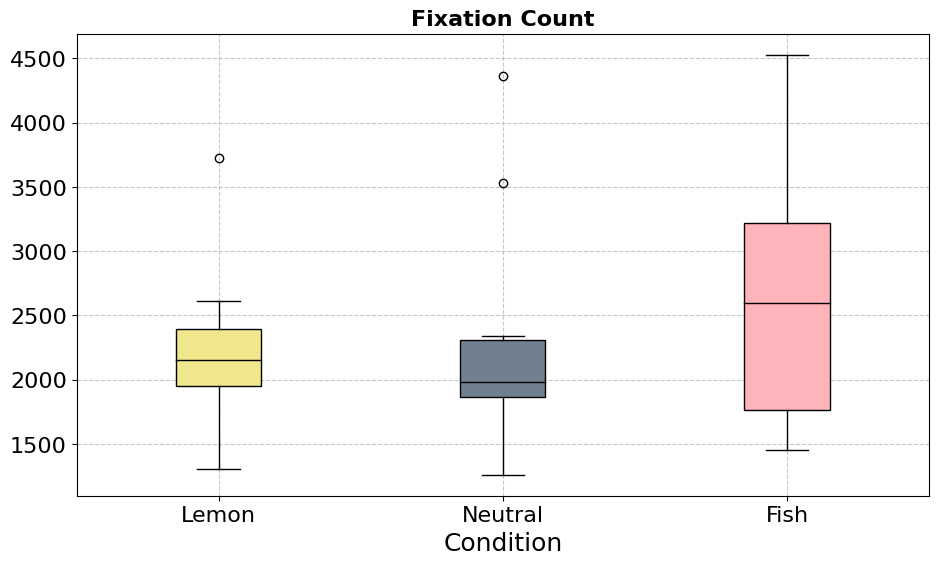

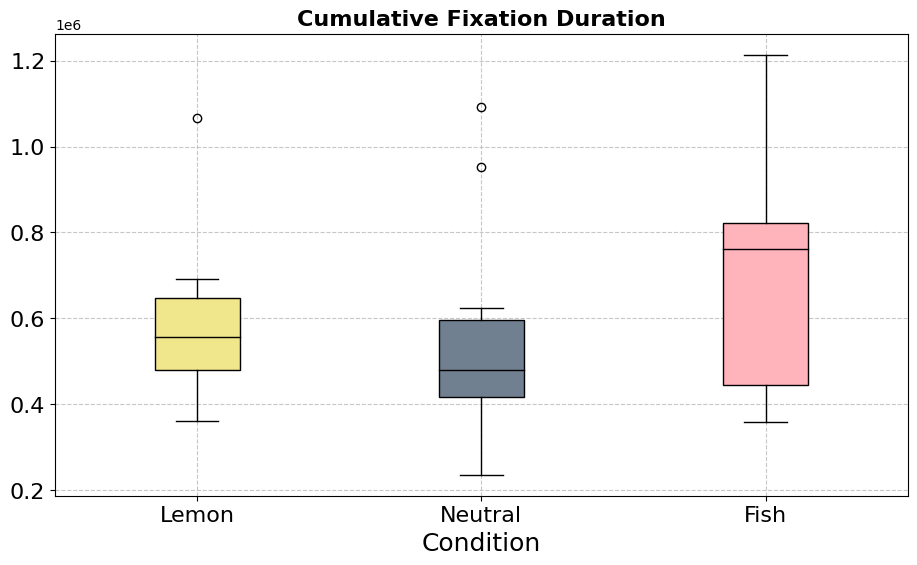

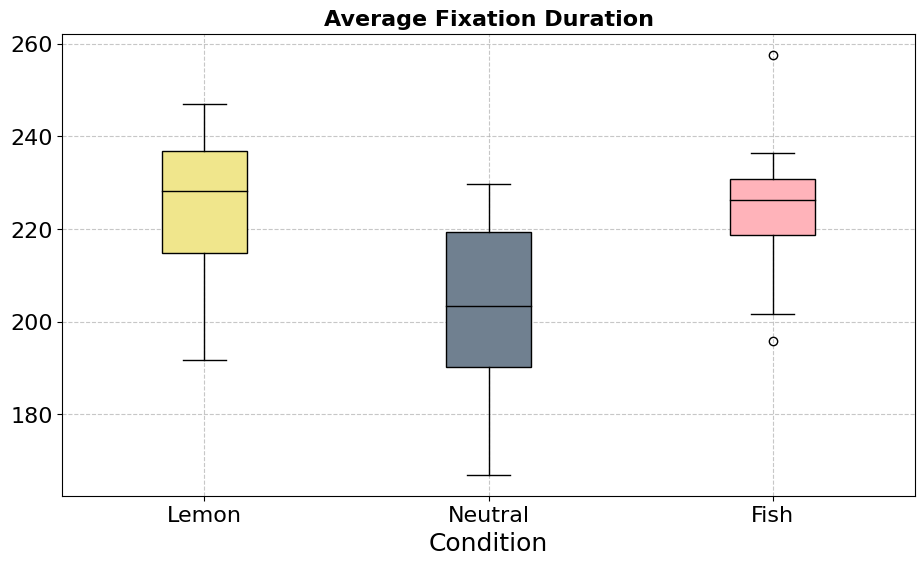

In [ ]:
# found in 'tobii metrics' folder
cc_df = pd.read_excel("tobii_metrics/code_summary.xlsx")
output_comp = calculate_stats(cc_df, relevant_columns)
# calculate_stats(cc_df)

In [ ]:
# need to remove the following
# fixation count: lemon - max value, neutral - top two values
output['Fixation Count']['lemon'] = output['Fixation Count']['lemon'][:-1]
output['Fixation Count']['neutral'] = output['Fixation Count']['neutral'][:-2]
# calculating stats
fish = pd.Series(output['Fixation Count']['fish'])
lemon = pd.Series(output['Fixation Count']['lemon'])
neutral = pd.Series(output['Fixation Count']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Fixation Count')

# cumulative fixation duration: lemon - max value, neutral - top two values
output['Cumulative Fixation Duration']['lemon'] = output['Cumulative Fixation Duration']['lemon'][:-1]
output['Cumulative Fixation Duration']['neutral'] = output['Cumulative Fixation Duration']['neutral'][:-2]
# calculating stats
fish = pd.Series(output['Cumulative Fixation Duration']['fish'])
lemon = pd.Series(output['Cumulative Fixation Duration']['lemon'])
neutral = pd.Series(output['Cumulative Fixation Duration']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Cumulative Fixation Duration')

# average fixation duration: fish - max and min values
output['Average Fixation Duration']['fish'] = output['Average Fixation Duration']['fish'][1:-1]
# calculating stats
fish = pd.Series(output['Average Fixation Duration']['fish'])
lemon = pd.Series(output['Average Fixation Duration']['lemon'])
neutral = pd.Series(output['Average Fixation Duration']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Average Fixation Duration')



### CODE WRITING

In [ ]:
# found in writingFixations folder
w_df = pd.read_csv("writingFixations/all_itrace_counts.csv")
output = calculate_stats(w_df, relevant_columns)


In [ ]:
# need to remove the following
# fixation count - lemon: min value
output['Fixation Count']['lemon'] = output['Fixation Count']['lemon'][1:]

# calculating stats
fish = pd.Series(output['Fixation Count']['fish'])
lemon = pd.Series(output['Fixation Count']['lemon'])
neutral = pd.Series(output['Fixation Count']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Fixation Count')

# cumulative fixation duraiton - neutral: 2 max values, fish: max value
output['Cumulative Fixation Duration']['fish'] = output['Cumulative Fixation Duration']['fish'][:-1]
output['Cumulative Fixation Duration']['neutral'] = output['Cumulative Fixation Duration']['neutral'][:-2]
# calculating stats
fish = pd.Series(output['Cumulative Fixation Duration']['fish'])
lemon = pd.Series(output['Cumulative Fixation Duration']['lemon'])
neutral = pd.Series(output['Cumulative Fixation Duration']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Cumulative Fixation Duration')

# average fixation duration - lemon: 2 max vlaues, neutral: 2 max values, fish: max value
output['Average Fixation Duration']['fish'] = output['Average Fixation Duration']['fish'][:-1]
output['Average Fixation Duration']['lemon'] = output['Average Fixation Duration']['lemon'][:-2]
output['Average Fixation Duration']['neutral'] = output['Average Fixation Duration']['neutral'][:-2]

# calculating stats
fish = pd.Series(output['Average Fixation Duration']['fish'])
lemon = pd.Series(output['Average Fixation Duration']['lemon'])
neutral = pd.Series(output['Average Fixation Duration']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Average Fixation Duration')


In [ ]:
# data = {
#     'neutral': [1342.0, 2348.0, 1675.0, 2293.0, 1283.0, 1302.0, 35.0, 1052.0, 1376.0, 2296.0],
#     'lemon': [1996.0, 1443.0, 1683.0, 1569.0, 786.0, 1706.0, 565.0, 1694.0, 1238.0, 2068.0],
#     'fish': [1742.0, 857.0, 1229.0, 1433.0, 1030.0, 833.0, 1218.0, 1320.0, 750.0, 1550.0]
# }

data = {
    'neutral': [1342.0, 1675.0, 2293.0, 1283.0, 1302.0, 1052.0, 1376.0],
    'lemon': [1996.0, 1443.0, 1683.0, 1569.0, 1706.0, 1694.0, 1238.0, 2068.0],
    'fish': [1742.0, 857.0, 1229.0, 1433.0, 1030.0, 833.0, 1218.0, 1320.0, 750.0, 1550.0]
}
# data = task_duration_data
# data = prose_saccades

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Code Writing: Total Fixation Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Fixation Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
x1, x2 = 1, 3  # positions for Lemon and Fish
y, h, col = max(max(data['lemon']), max(data['fish'])) + 200, 200, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"**", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([0,2750])

# Remove top and right spines for a cleaner look
sns.despine()
plt.savefig("figures/fixations_box_plot.png", dpi=150)
# Show the plot
plt.show()

### Reading Comprehension

In [ ]:
prose_df = pd.read_excel("tobii metrics/prose_summary.xlsx")
output = calculate_stats(prose_df, relevant_columns)


In [ ]:
# need to remove the following
# fixation count - neutral: max value, fish: max and min values
output['Fixation Count']['neutral'] = output['Fixation Count']['neutral'][:-1]
output['Fixation Count']['fish'] = output['Fixation Count']['fish'][1:-1]

# calculating stats
fish = pd.Series(output['Fixation Count']['fish'])
lemon = pd.Series(output['Fixation Count']['lemon'])
neutral = pd.Series(output['Fixation Count']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Fixation Count')

# cumulative fixation duraiton - lemon: max value, neutral: max value, fish: 2 max values and min value
output['Cumulative Fixation Duration']['lemon'] = output['Cumulative Fixation Duration']['lemon'][:-1]
output['Cumulative Fixation Duration']['neutral'] = output['Cumulative Fixation Duration']['neutral'][:-1]
output['Cumulative Fixation Duration']['fish'] = output['Cumulative Fixation Duration']['fish'][1:-2]
# calculating stats
fish = pd.Series(output['Cumulative Fixation Duration']['fish'])
lemon = pd.Series(output['Cumulative Fixation Duration']['lemon'])
neutral = pd.Series(output['Cumulative Fixation Duration']['neutral'])
three_lists_stats(fish, lemon, neutral, 'Cumulative Fixation Duration')


### SACCADES

In [ ]:
task_data = pd.read_excel("Experimental_Data_revised.xlsx", "Tasks")

In [ ]:
fish_idx = np.where(task_data['CONDITION'] == 'bad')
lemon_idx = np.where(task_data['CONDITION'] == 'good')
neutral_idx = np.where(task_data['CONDITION'] == 'neutral')

fish_ppl = list(task_data.loc[fish_idx, 'ID'])
lemon_ppl = list(task_data.loc[lemon_idx, 'ID'])
neutral_ppl = list(task_data.loc[neutral_idx, 'ID'])

In [ ]:
# datadir = "/storage1/smell-study/fixed_prolabs/"
# filenames = os.listdir(datadir)
# # print(datadir)

# ccd_saccades = {
#     'fish' : [],
#     'lemon' : [],
#     'neutral' : []
# }

# prose_saccades = {
#     'fish' : [],
#     'lemon' : [],
#     'neutral' : []
# }

# def calculate_saccades(df):
#     # print(df.columns)
#     # col = df['Eye movement type']
#     saccade_mask = df['Eye movement type'] == 'Saccade'
#     sequence_start = saccade_mask & ~saccade_mask.shift(1, fill_value=False)
#     return sequence_start.sum() 

# for f in filenames: 
#     print(f)
#     pid = int(re.split("_", f)[0]) # filenames formatted like 675_tobii.tsv, so this isolates just the pid
#     group = 'fish' if pid in fish_ppl else 'lemon' if pid in lemon_ppl else 'neutral' if pid in neutral_ppl else 'boogy-woogy'
    
#     pidf = pd.read_csv(f"{datadir}/{f}", sep='\t')
    
#     ccd_df = pidf.loc[np.where(pidf['Timeline name'] == 'Code')[0], :]
#     prose_df = pidf.loc[np.where(pidf['Timeline name'] == 'Prose')[0], :]
    
#     ccd_count = calculate_saccades(ccd_df)
#     prose_count = calculate_saccades(prose_df)
    
#     ccd_saccades[group].append(ccd_count)
#     prose_saccades[group].append(prose_count)

# # saving output
# # with open("saccades/ccd_saccades.pkl", 'wb') as f:
# #     pickle.dump(ccd_saccades, f)
    
# # with open("saccades/prose_saccades.pkl", 'wb') as f:
# #     pickle.dump(prose_saccades, f)

In [ ]:
with open("saccades/ccd_saccades.pkl", 'rb') as f:
    ccd_saccades = pickle.load(f)
    
with open("saccades/prose_saccades.pkl", 'rb') as f:
    prose_saccades = pickle.load(f)
    
with open("saccades/writing_saccades.pkl", 'rb') as f:
    writing_saccades = pickle.load(f)

In [ ]:
# for k, v in ccd_saccades.items():
#     ccd_saccades[k] = [int(el) for el in v]
# for k, v in prose_saccades.items():
#     prose_saccades[k] = [int(el) for el in v]
# for k, v in writing_saccades.items():
#     writing_saccades[k] = [int(el) for el in v]
    
prose_saccades = three_lists_stats(fish_list=pd.Series(prose_saccades['fish']), 
                  lemon_list=pd.Series(prose_saccades['lemon']), 
                  neut_list=pd.Series(prose_saccades['neutral']), name='Saccades: Prose Comprehension')

code_saccades = three_lists_stats(fish_list=pd.Series(ccd_saccades['fish']), 
                  lemon_list=pd.Series(ccd_saccades['lemon']), 
                  neut_list=pd.Series(ccd_saccades['neutral']), name='CODE SACCADES')

writing_saccades = three_lists_stats(fish_list=pd.Series(writing_saccades['fish']), 
                  lemon_list=pd.Series(writing_saccades['lemon']), 
                  neut_list=pd.Series(writing_saccades['neutral']), name='WRITING SACCADES')

In [ ]:
# need to remove the following
# code_saccades - lemon: remove max, neutral: remove max
code_saccades['lemon'] = code_saccades['lemon'][:-1]
code_saccades['neutral'] = code_saccades['neutral'][:-1]

# calculating stats
fish = pd.Series(code_saccades['fish'])
lemon = pd.Series(code_saccades['lemon'])
neutral = pd.Series(code_saccades['neutral'])
three_lists_stats(fish, lemon, neutral, 'Saccades: Code Reading')

# writing_saccades - lemon: remove top 2 and bottom 2, neutral: remove max
writing_saccades['lemon'] = writing_saccades['lemon'][2:-2]
writing_saccades['neutral'] = writing_saccades['neutral'][:-1]

# calculating stats
fish = pd.Series(writing_saccades['fish'])
lemon = pd.Series(writing_saccades['lemon'])
neutral = pd.Series(writing_saccades['neutral'])
three_lists_stats(fish, lemon, neutral, 'Code Writing Saccades')


In [ ]:

data = {
    'fish': [2848.0, 3325.0, 3550.0, 3993.0, 4026.0, 4221.0, 5421.0, 5551.0, 5732.0, 6633.0],
    'lemon': [2124.0, 2846.0, 2959.0, 3118.0, 3433.0, 3507.0, 3641.0, 4054.0, 4400.0],
    'neutral': [3492.0, 3622.0, 3640.0, 3641.0, 3752.0, 3846.0, 4435.0, 4814.0, 5132.0]
}

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Code Comprehension: Total Saccade Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Saccade Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
x1, x2 = 1, 3  # positions for Lemon and Fish
y, h, col = max(max(data['lemon']), max(data['fish'])) + 600, 400, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"*", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([1000, 8500])

# Remove top and right spines for a cleaner look
sns.despine()
plt.savefig("figures/saccade_code_box_plot.png", dpi=150)
# Show the plot
plt.show()

In [ ]:
data = {
    'fish': [2811.0, 3012.0, 3165.0, 3306.0, 3385.0, 3402.0, 3403.0, 3544.0, 3636.0, 3656.0],
    'lemon': [2074.0, 2381.0, 2450.0, 2641.0, 2762.0, 2912.0, 2980.0, 3247.0, 3276.0, 3378.0],
    'neutral': [1986.0, 2118.0, 2374.0, 2397.0, 3197.0, 3326.0, 3396.0, 3473.0, 4266.0, 4675.0]
}

sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Prose Comprehension: Total Saccade Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Saccade Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
x1, x2 = 1, 3  # positions for Lemon and Fish
y, h, col = max(max(data['lemon']), max(data['fish'])) + 1200, 400, 'black'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, f"**", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([1000, 6000])

# Remove top and right spines for a cleaner look
sns.despine()
plt.savefig("figures/saccade_prose_box_plot.png", dpi=150)
# Show the plot
plt.show()

In [ ]:
data = {
    'fish': [2209.0, 2262.0, 2486.0, 2658.0, 3080.0, 3428.0, 3471.0, 3550.0, 3763.0, 3763.0],
    'lemon': [3418.0, 3427.0, 3626.0, 3706.0, 3857.0, 3933.0],
    'neutral': [2418.0, 2611.0, 2679.0, 2750.0, 3359.0, 4083.0, 4233.0, 5163.0, 5233.0]
}

sns.set(style="whitegrid")

# Creating boxplot
plt.figure(figsize=(8, 6))
box = plt.boxplot(
    [data['lemon'], data['neutral'], data['fish']], 
    labels=['Lemon', 'Neutral', 'Fish'], 
    patch_artist=True, 
    boxprops=dict(facecolor='lightgray', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

# Set individual colors for the boxes
colors = ['#F0E68C', '#708090', '#FFB3BA'] 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Adding title and labels
plt.title("Code Writing: Total Saccade Counts", fontsize=16, fontweight='bold')
plt.xlabel("Condition", fontsize=18)
plt.ylabel("Saccade Total", fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=16)

# Add gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Calculate p-value for significance (e.g., using a t-test)
t_stat, p_val = stats.ttest_ind(data['lemon'], data['fish'])

# Adding the significance annotation
# x1, x2 = 1, 3  # positions for Lemon and Fish
# y, h, col = max(max(data['lemon']), max(data['fish'])) + 1200, 400, 'black'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, f"*", ha='center', va='bottom', fontsize=16, color=col)

ax = plt.gca()
ax.set_ylim([1000, 6000])

# Remove top and right spines for a cleaner look
sns.despine()
plt.savefig("figures/saccade_writing_box_plot.png", dpi=150)
# Show the plot
plt.show()